#Import Library


In [ ]:
import os

# Numpy
import numpy as np

#Pandas
import pandas as pd

#matplotlib
import matplotlib.pyplot as plt

# Seaborn
import seaborn as sns
#Library for statistical modelling
from sklearn.preprocessing import LabelEncoder
#Library for ignoring the warnings
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')


#Data Collection

In [ ]:
# Load Heart disease dataset
df = pd.read_csv("/content/Heart Disease data.csv")
na_values=("??","????")

In [ ]:
print("Team:-THE ANALYZERS")
df.head()

Team:-THE ANALYZERS


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [ ]:
df.shape

(1025, 14)

In [ ]:
df.head().style.set_properties(**{'background_color': 'red' ,'color':'green' ,'border_color':'blue' })

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.000000,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.100000,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.600000,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.000000,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.900000,1,3,2,0


In [ ]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [ ]:
print(df)

      age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0      52    1   0       125   212    0        1      168      0      1.0   
1      53    1   0       140   203    1        0      155      1      3.1   
2      70    1   0       145   174    0        1      125      1      2.6   
3      61    1   0       148   203    0        1      161      0      0.0   
4      62    0   0       138   294    1        1      106      0      1.9   
...   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
1020   59    1   1       140   221    0        1      164      1      0.0   
1021   60    1   0       125   258    0        0      141      1      2.8   
1022   47    1   0       110   275    0        0      118      1      1.0   
1023   50    0   0       110   254    0        0      159      0      0.0   
1024   54    1   0       120   188    0        1      113      0      1.4   

      slope  ca  thal  target  
0         2   2     3       0  
1         0

In [ ]:
df2=df.copy()

#Data Wrangling

1)Computing the size of dataset


In [ ]:
print("The shape of data frame:", df2.shape)
# Print the length (number of rows) of the DataFrame
print("Number of Rows in the dataframe:", len(df2))
# Print the number of columns in the DataFrame
print("Number of Columns in the dataframe:", len(df2.columns))

The shape of data frame: (1025, 14)
Number of Rows in the dataframe: 1025
Number of Columns in the dataframe: 14


2) Enlist the columns of dataset

In [ ]:
print("Team:- The Analyzers")
print ('Columns labels in datset in columns order')
for column in df2.columns:
  print(column)

Team:- The Analyzers
Columns labels in datset in columns order
age
sex
cp
trestbps
chol
fbs
restecg
thalach
exang
oldpeak
slope
ca
thal
target


3) Generating Basic information of Attributes

In [ ]:
print(df2.info(verbose = True))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB
None


4)Check Duplicates

In [ ]:
print("Team:- The Analyzers")
data_dup=df2.duplicated().any()
print(data_dup)

Team:- The Analyzers
True


5) Drop Duplicates


In [ ]:
df2=df2.drop_duplicates()

In [ ]:
df2.shape

(302, 14)

In [ ]:
data_dup=df2.duplicated().any()
print(data_dup)

False


6) Enlist numerical feature

In [ ]:
df2.select_dtypes(np.number).sample(5).style.set_properties(**{'background-color': '#E9F6E2',
                                                              'color': 'green','border-color': '#8b8c8c'})

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
521,58,1,1,125,220,0,1,144,0,0.400000,1,4,3,1
244,51,1,2,125,245,1,0,166,0,2.400000,1,0,2,1
234,49,0,0,130,269,0,1,163,0,0.000000,2,0,2,1
111,53,1,0,142,226,0,0,111,1,0.000000,2,0,3,1
369,51,1,2,110,175,0,1,123,0,0.600000,2,0,2,1


####Value count of attribute

In [ ]:
df2['cp'].value_counts()


,count
cp,
0,143
2,86
1,50
3,23


In [ ]:
df2['thal'].value_counts()


,count
thal,
2,165
3,117
1,18
0,2


In [ ]:
df2['ca'].value_counts()


,count
ca,
0,175
1,65
2,38
3,20
4,4


In [ ]:
df2['target'].value_counts()


,count
target,
1,164
0,138


In [ ]:
df2.describe().T

,count,mean,std,min,25%,50%,75%,max
age,302.0,54.420530,9.047970,29.0,48.00,55.5,61.00,77.0
sex,302.0,0.682119,0.466426,0.0,0.00,1.0,1.00,1.0
cp,302.0,0.963576,1.032044,0.0,0.00,1.0,2.00,3.0
trestbps,302.0,131.602649,17.563394,94.0,120.00,130.0,140.00,200.0
chol,302.0,246.500000,51.753489,126.0,211.00,240.5,274.75,564.0
fbs,302.0,0.149007,0.356686,0.0,0.00,0.0,0.00,1.0
restecg,302.0,0.526490,0.526027,0.0,0.00,1.0,1.00,2.0
thalach,302.0,149.569536,22.903527,71.0,133.25,152.5,166.00,202.0
exang,302.0,0.327815,0.470196,0.0,0.00,0.0,1.00,1.0
oldpeak,302.0,1.043046,1.161452,0.0,0.00,0.8,1.60,6.2


5) Replace Value

In [ ]:
df2["cp"] = df2["cp"].replace({0:"ATA",1:"NAP",2:"ASY",3:"TA"})

In [ ]:
df2["fbs"] = df2["fbs"].replace({0:"True",1:"False"})

In [ ]:
df2["thal"] = df2["thal"].replace({1:"normal",2:"fixed defect",3:"reversible defect"})

In [ ]:
df2["slope"] = df2["slope"].replace({0:"Up",1:"Flat",2:"Down"})

In [ ]:
df2["target"] = df2["target"].replace({0:"No",1:"Yes"})

In [ ]:
df2

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,ATA,125,212,True,1,168,0,1.0,Down,2,reversible defect,No
1,53,1,ATA,140,203,False,0,155,1,3.1,Up,0,reversible defect,No
2,70,1,ATA,145,174,True,1,125,1,2.6,Up,0,reversible defect,No
3,61,1,ATA,148,203,True,1,161,0,0.0,Down,1,reversible defect,No
4,62,0,ATA,138,294,False,1,106,0,1.9,Flat,3,fixed defect,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
723,68,0,ASY,120,211,True,0,115,0,1.5,Flat,0,fixed defect,Yes
733,44,0,ASY,108,141,True,1,175,0,0.6,Flat,0,fixed defect,Yes
739,52,1,ATA,128,255,True,1,161,1,0.0,Down,1,reversible defect,No
843,59,1,TA,160,273,True,0,125,0,0.0,Down,0,fixed defect,No


In [ ]:
df2


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,ATA,125,212,True,1,168,0,1.0,Down,2,reversible defect,No
1,53,1,ATA,140,203,False,0,155,1,3.1,Up,0,reversible defect,No
2,70,1,ATA,145,174,True,1,125,1,2.6,Up,0,reversible defect,No
3,61,1,ATA,148,203,True,1,161,0,0.0,Down,1,reversible defect,No
4,62,0,ATA,138,294,False,1,106,0,1.9,Flat,3,fixed defect,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
723,68,0,ASY,120,211,True,0,115,0,1.5,Flat,0,fixed defect,Yes
733,44,0,ASY,108,141,True,1,175,0,0.6,Flat,0,fixed defect,Yes
739,52,1,ATA,128,255,True,1,161,1,0.0,Down,1,reversible defect,No
843,59,1,TA,160,273,True,0,125,0,0.0,Down,0,fixed defect,No


#Visualization

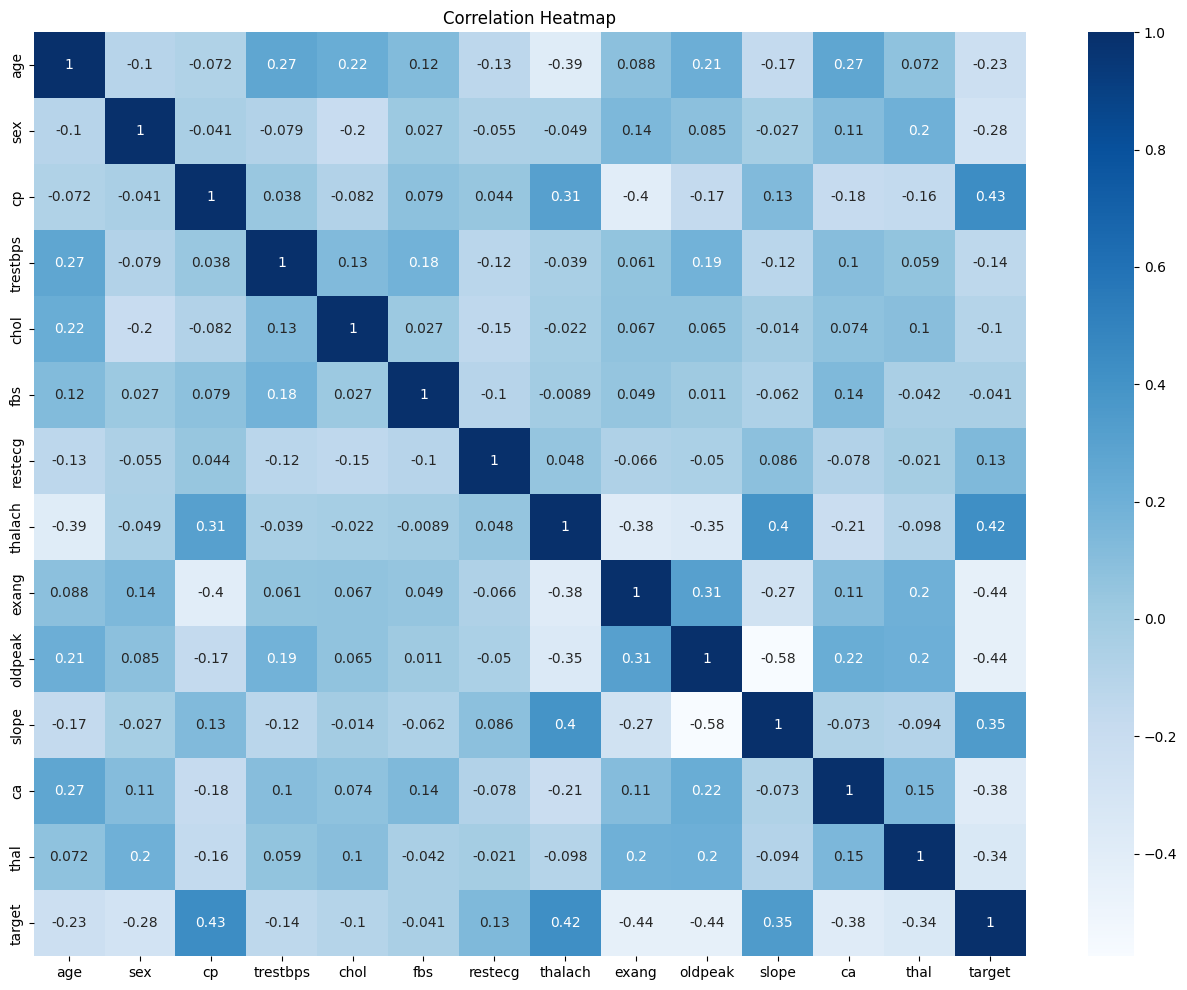

In [ ]:
df .corr()
plt.figure(figsize=(16,12))
sns.heatmap(df.corr(),annot=True,cmap='Blues')
plt.title('Correlation Heatmap')
plt.show()

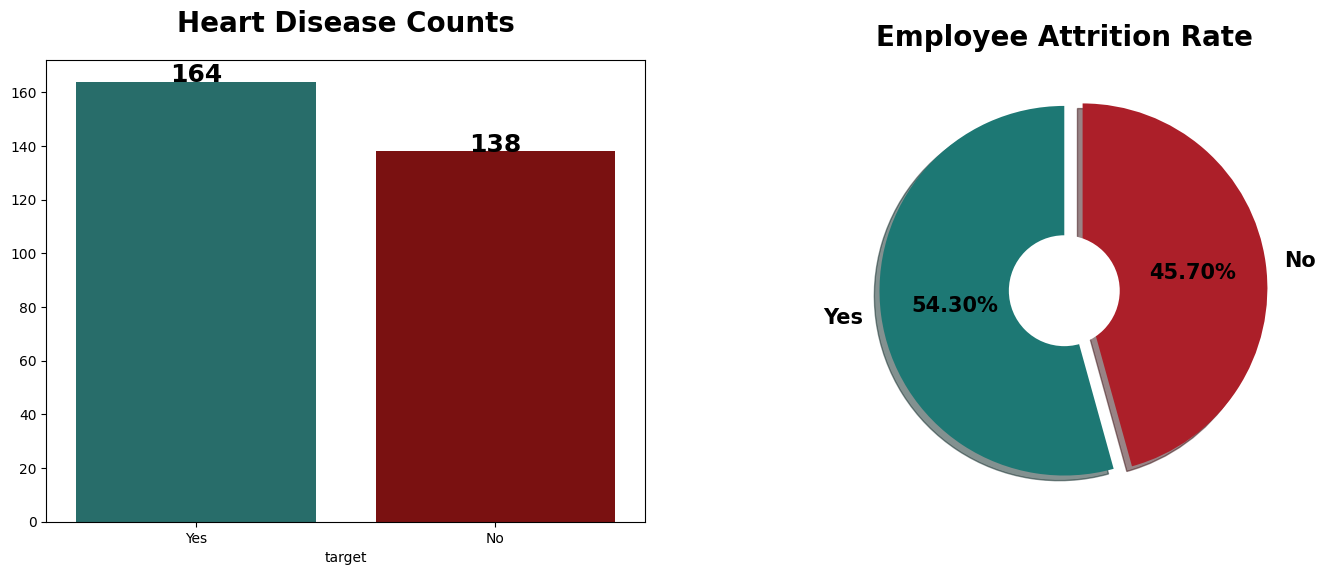

In [ ]:
plt.figure(figsize=(17,6))
plt.subplot(1,2,1)
heart_rate = df2["target"].value_counts()
sns.barplot(x=heart_rate.index,y=heart_rate.values,palette=["#1d7874","#8B0000"])
plt.title("Heart Disease Counts",fontweight="black",size=20,pad=20)
for i, v in enumerate(heart_rate.values):
    plt.text(i, v, v,ha="center", fontweight='black', fontsize=18)
#pie chart
plt.subplot(1,2,2)
plt.pie(df2['target'].value_counts(), labels=["Yes","No"],autopct="%.2f%%", textprops={"fontweight":"black","size":15},explode=[0,0.1] ,colors = ["#1d7874","#AC1F29"], startangle=90 ,shadow=True)
plt.title("Heart Disease ",fontweight="black",size=20,pad=20)
center_circle = plt.Circle((0, 0), 0.3, fc='white')
fig = plt.gcf()
fig.gca().add_artist(center_circle)
plt.title("Employee Attrition Rate",fontweight="black",size=20,pad=10)
plt.show()





Find Count of male and female in this dataset

In [ ]:
df2['sex'].value_counts()


,count
sex,
1,206
0,96


Text(0.5, 1.0, 'Counts of Male And Female')

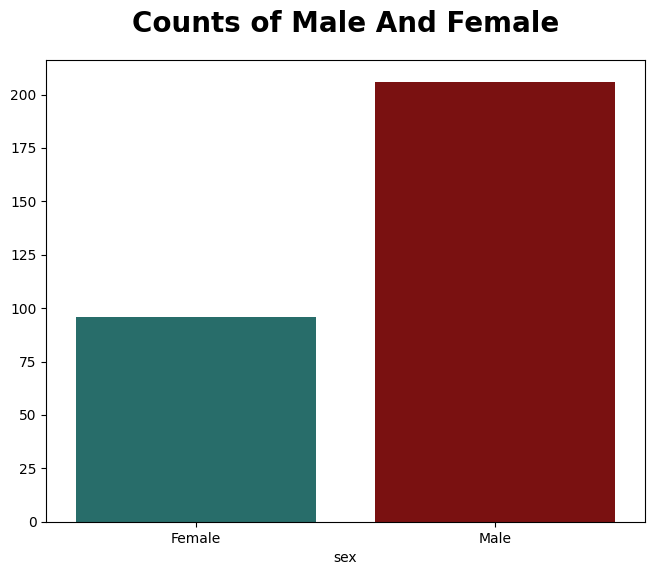

In [ ]:
plt.figure(figsize=(17,6))
plt.subplot(1,2,1)
gender_count = df2["sex"].value_counts()
sns.barplot(x=gender_count.index,y=gender_count.values,palette=["#1d7874","#8B0000"])
plt.xticks([0,1],['Female','Male'])
plt.title("Counts of Male And Female",fontweight="black",size=20,pad=20)

Find Gender Distribution According to target variable

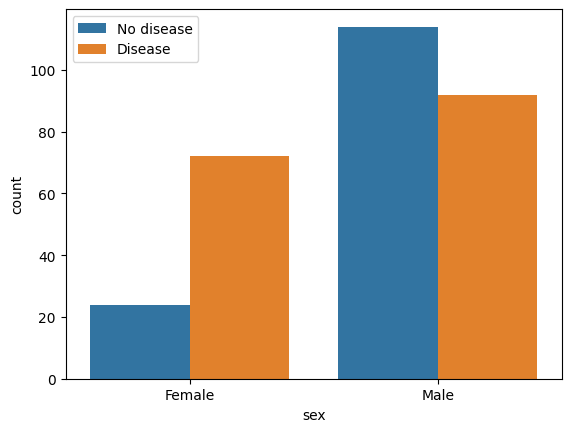

In [ ]:
sns.countplot(x='sex',hue='target',data=df2)
plt.xticks([0,1],['Female','Male'])
plt.legend(labels=['No disease','Disease'])
plt.show()

Check Age Distribution in the dateset

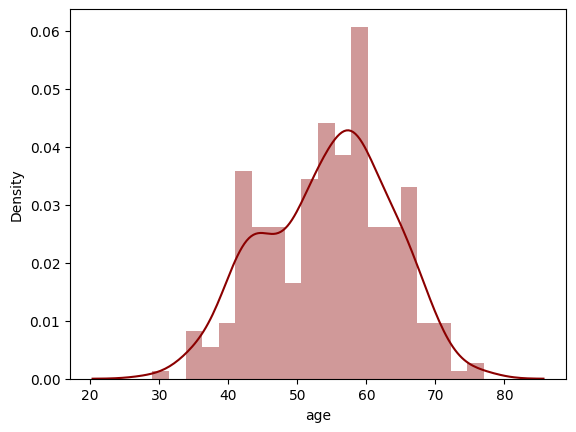

In [ ]:
sns.distplot(df2['age'],bins=20,hist=True, color="#8B0000")
plt.show()

Counts of Chest Pain Type


*   ATA: A Typical angina
*   NAP:Non Anginal pain
*   ASY:Asymptomatic
*   TA:Typical Angina






In [ ]:
df2["cp"].value_counts()

,count
cp,
ATA,143
ASY,86
NAP,50
TA,23


In [ ]:
df2['cp'].values

array(['ATA', 'ATA', 'ATA', 'ATA', 'ATA', 'ATA', 'ATA', 'ATA', 'ATA',
       'ATA', 'ATA', 'ATA', 'NAP', 'ATA', 'ATA', 'ASY', 'ATA', 'NAP',
       'ASY', 'ASY', 'ATA', 'ATA', 'ASY', 'ASY', 'ATA', 'ASY', 'NAP',
       'ASY', 'ATA', 'ATA', 'ATA', 'ASY', 'ASY', 'ASY', 'TA', 'ATA',
       'ATA', 'ASY', 'ASY', 'ASY', 'ATA', 'NAP', 'ATA', 'NAP', 'ATA',
       'ASY', 'ATA', 'TA', 'ATA', 'ASY', 'ASY', 'ATA', 'TA', 'NAP', 'ASY',
       'NAP', 'NAP', 'ATA', 'ASY', 'TA', 'ASY', 'ATA', 'ASY', 'ATA',
       'ATA', 'ATA', 'ATA', 'ATA', 'ATA', 'ASY', 'ASY', 'ATA', 'NAP',
       'ASY', 'ASY', 'NAP', 'ATA', 'ATA', 'ATA', 'ASY', 'ATA', 'NAP',
       'ATA', 'ATA', 'ATA', 'ATA', 'ASY', 'ASY', 'ASY', 'NAP', 'TA',
       'ATA', 'ATA', 'NAP', 'ATA', 'ATA', 'ATA', 'ATA', 'ATA', 'ASY',
       'ATA', 'ATA', 'NAP', 'ATA', 'ASY', 'ATA', 'TA', 'ATA', 'ASY',
       'ATA', 'ASY', 'ATA', 'ATA', 'NAP', 'ATA', 'ATA', 'TA', 'TA', 'ATA',
       'ATA', 'ASY', 'ATA', 'TA', 'ASY', 'NAP', 'ATA', 'ATA', 'TA', 'ASY',
       'N

Text(0.5, 1.0, 'Counts of Chest Pain')

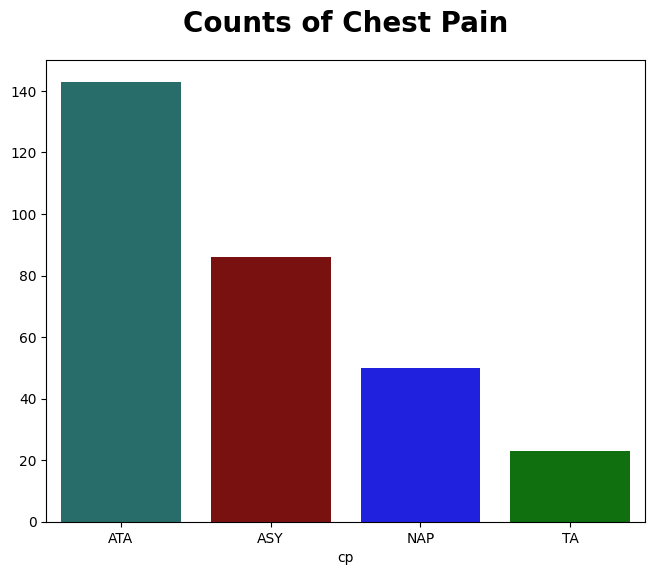

In [ ]:
plt.figure(figsize=(17,6))
plt.subplot(1,2,1)
chest_count = df2["cp"].value_counts()
sns.barplot(x=chest_count.index,y=chest_count.values,palette=["#1d7874","#8B0000","blue","green","yellow"])
# plt.xticks([0,1],['Female','Male'])
plt.title("Counts of Chest Pain",fontweight="black",size=20,pad=20)

Show Distribution of Chest Pain As per Target Variable

In [ ]:
df2['target'].value_counts()

,count
target,
Yes,164
No,138


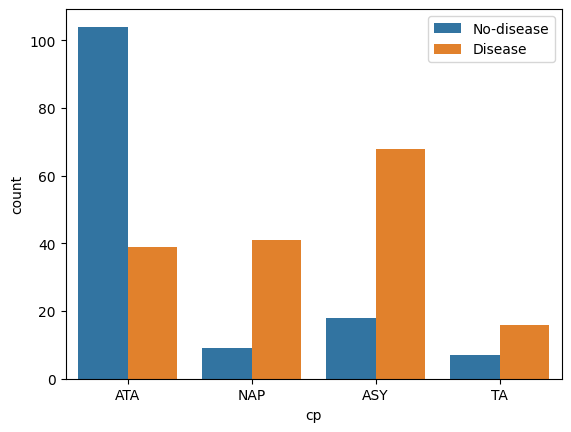

In [ ]:
sns.countplot(x='cp',hue='target',data=df2)
# plt.xticks([0,1],['Female','Male'])
plt.legend(labels=['No-disease','Disease'])
plt.show()

Show Fasting Blood Sugar Distribution As per 'Target'variable  

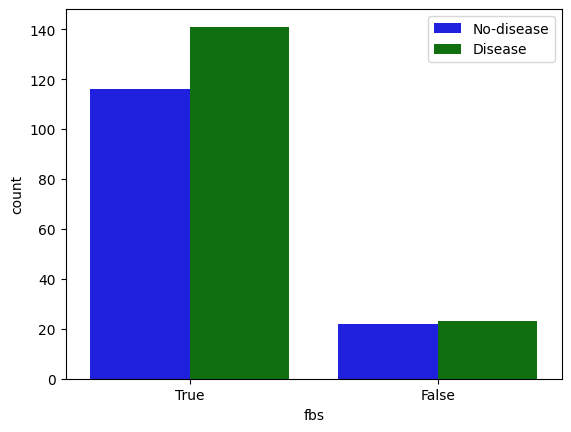

In [ ]:
sns.countplot(x='fbs',hue='target',data=df2 ,palette=['blue','green'])
# plt.xticks([0,1],['Female','Male'])
plt.legend(labels=['No-disease','Disease'])
plt.show()

Check Resting blood sugar distribution

<Axes: >

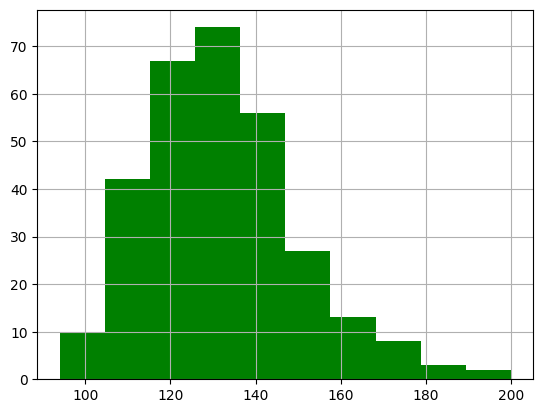

In [ ]:
# plt.figure(figsize=(13,6))
# plt.subplot(1,2,1)
# sns.histplot(x="fbs", hue="target", kde=True ,data=df,palette=["#11264e","#6faea4"])
# plt.title("Employee Attrition by Monthly Income",fontweight="black",size=20,pad=15)
df2['trestbps'].hist(color='green')

Compare resting blood sugar as per sex columns

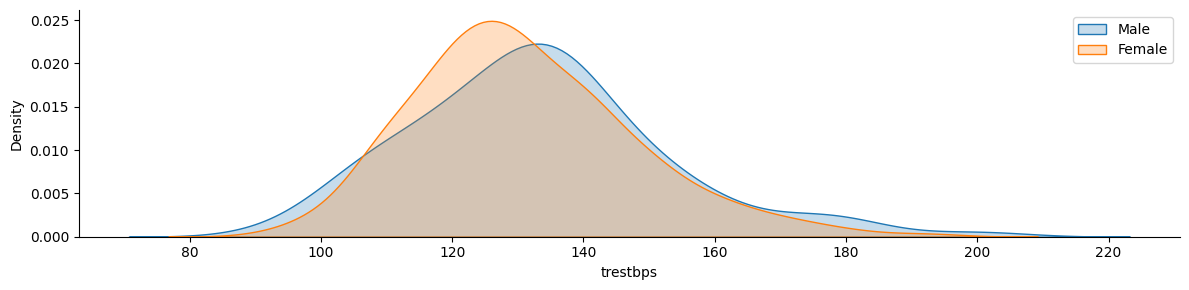

In [ ]:
g = sns.FacetGrid(df2,hue='sex', aspect=4)
g.map(sns.kdeplot ,"trestbps",shade=True)
plt.legend(labels=["Male","Female"])
plt.show()

Show Distribution Of Serum Cholestrol

In [ ]:
df2.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

<Axes: >

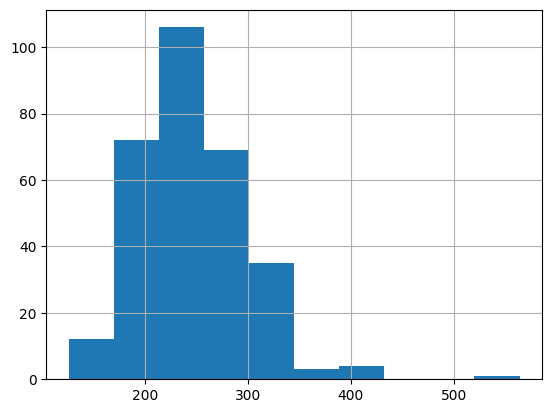

In [ ]:
df2['chol'].hist()

The average cholesterol among the population within the dataset: 246.5


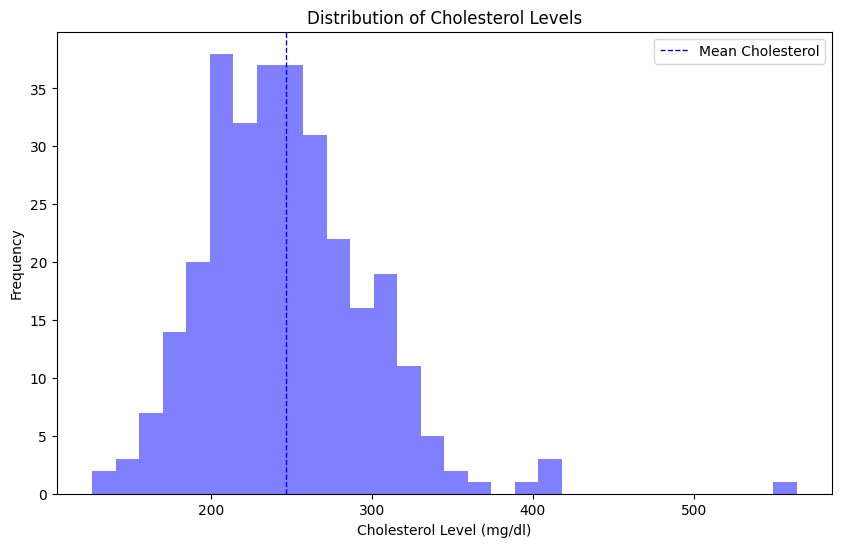

In [ ]:
# Calculate mean cholesterol levels for the entire dataset
mean_total = np.mean(df2['chol'])

# Print the average cholesterol level
print('The average cholesterol among the population within the dataset:', mean_total)

# Plot overlapping histograms
plt.figure(figsize=(10, 6))
plt.hist(df2['chol'], bins=30, alpha=0.5, color='blue')
plt.axvline(mean_total, color='blue', linestyle='dashed', linewidth=1, label='Mean Cholesterol')
plt.xlabel('Cholesterol Level (mg/dl)')
plt.ylabel('Frequency')
plt.title('Distribution of Cholesterol Levels')
plt.legend()
plt.show()

In [ ]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')